In [77]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

Problem - 1

In [78]:
b = {'city': 'Cupertino', 'phone': '408 996 1010', 'state': 'CA', 'country': 'United States', 'website': 'https://www.apple.com', 'recommendationKey': 'buy', 'gross profits': 152836000000, 'freeCashflow': 73295003648, 'targetMedianPrice': 170, 'currentPrice': 174.56, 'earningsGrowth': 0.662, 'currentRatio': 1.075}
print(f"The Apple company is located in {b['country']} and has gross profits of ${b['gross profits']:,}.")


df = pd.DataFrame([b])
df.columns = df.columns.str.lower().str.replace(' ', '_').str.strip()

print(df)

The Apple company is located in United States and has gross profits of $152,836,000,000.
        city         phone state        country                website  \
0  Cupertino  408 996 1010    CA  United States  https://www.apple.com   

  recommendationkey  gross_profits  freecashflow  targetmedianprice  \
0               buy   152836000000   73295003648                170   

   currentprice  earningsgrowth  currentratio  
0        174.56           0.662         1.075  


Problem - 2

In [79]:
df = pd.read_csv(r"C:\Users\akw97\Downloads\PythonProgramming-AKW-\data\rentals.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8111 entries, 0 to 8110
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8111 non-null   int64  
 1   latitude        8111 non-null   float64
 2   longitude       8111 non-null   float64
 3   property_type   8111 non-null   object 
 4   room_type       8111 non-null   object 
 5   bathrooms       8099 non-null   float64
 6   bedrooms        8107 non-null   float64
 7   minimum_nights  8111 non-null   int64  
 8   price           8111 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 570.4+ KB


In [80]:
df['price'] = df['price'].str.strip()
df['price'] = df['price'].str.replace('[\$,]','', regex = True)
df['price'] = df['price'].astype(float)
df_cleaned = df.dropna()

In [81]:
print(df.groupby('property_type')['price'].mean())

property_type
Aparthotel            159.317073
Apartment             204.621955
Bed and breakfast     155.372093
Boutique hotel        460.460674
Bungalow              169.764706
Cabin                 151.333333
Camper/RV              20.000000
Castle                101.000000
Condominium           273.226457
Cottage               219.583333
Dome house            135.000000
Earth house           354.500000
Guest suite           160.956672
Guesthouse            204.658537
Hostel                 69.782609
Hotel                 265.490446
House                 224.442524
Hut                    69.000000
In-law                155.000000
Loft                  277.863636
Other                 173.500000
Resort                484.000000
Serviced apartment    226.355372
Tiny house            170.000000
Townhouse             292.528169
Villa                 379.200000
Name: price, dtype: float64


C:\Users\akw97\AppData\Local\Temp\ipykernel_8632\3815731030.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price', y='property_type', data=df, palette='viridis')


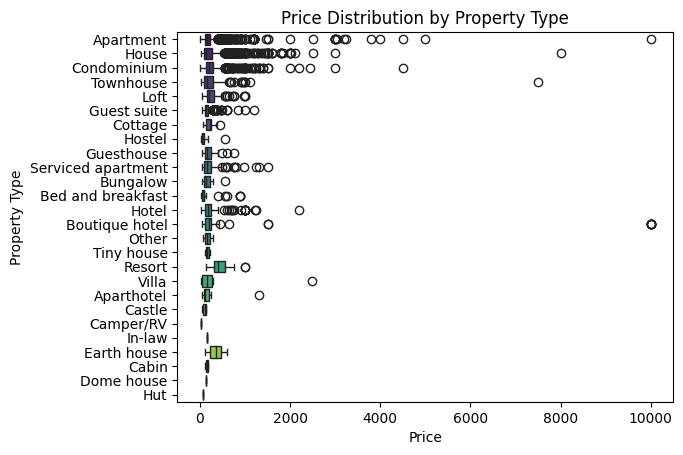

'From the box plot we can see that the majority of the property types are Apartment, House, Condominium. There are also quite a few outliers\nin each of the categories and apartments and boutique hotels contian the most varied datas. The majority of the prices are gathered in one place\nwhich means that although the datasets contains a few outliers, the dataset, overall, is reliable.'

In [82]:
sns.boxplot(x='price', y='property_type', data=df, palette='viridis')
plt.title('Price Distribution by Property Type')
plt.xlabel('Price')
plt.ylabel('Property Type')
plt.show()

"""From the box plot we can see that the majority of the property types are Apartment, House, Condominium. There are also quite a few outliers
in each of the categories and apartments and boutique hotels contian the most varied datas. The majority of the prices are gathered in one place
which means that although the datasets contains a few outliers, the dataset, overall, is reliable."""

Problem - 3

In [86]:
df = pd.read_csv(r"C:\Users\akw97\Downloads\PythonProgramming-AKW-\data\HR_5000 Records.csv")
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002 entries, 0 to 5001
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Emp ID                  5002 non-null   int64  
 1   Name Prefix             5002 non-null   object 
 2   First Name              5002 non-null   object 
 3   Middle Initial          5002 non-null   object 
 4   Last Name               5002 non-null   object 
 5   Gender                  5002 non-null   object 
 6   E Mail                  5002 non-null   object 
 7   Father's Name           5002 non-null   object 
 8   Mother's Name           5002 non-null   object 
 9   Mother's Maiden Name    5002 non-null   object 
 10  Date of Birth           5002 non-null   object 
 11  Time of Birth           5002 non-null   object 
 12  Age in Yrs.             5002 non-null   float64
 13  Weight in Kgs.          5002 non-null   int64  
 14  Date of Joining         5002 non-null   

In [84]:
object_columns = df.select_dtypes(include='object').columns.tolist()

In [85]:
df.fillna(df.median(numeric_only=True), inplace=True)